# Exploratory Data Analysis of the National Collision Database 2017

In [1]:
import pandas as pd
import numpy as np
import altair as alt

from sklearn.model_selection import train_test_split

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype');

In [2]:
# pip install altair_data_server

## Read in the data set

The data set used in this project is National Collision Database (NCDB) 2017 – a database containing all police-reported motor vehicle collisions on public roads in Canada in 2017. 
<ul>
  <li><a href="https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a/resource/01426d41-529c-443f-a901-6bc2f94f3d73">
      Data file can be found here.</a></li>
  <li><a href="https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a/resource/09b74afc-2745-4382-8a02-3e256c4b28fd">
      Data dictionary can be found here.</a></li>

In [4]:
# Getting list of column names from NCDB
col_names = pd.read_csv('data/NCDB_2017.csv', nrows=0).columns

# Creating custom data type dictionary for NCDB columns
types_dict = {'C_YEAR': int, 'C_SEV': int, 'C_CASE': int}
types_dict.update({col: str for col in col_names if col not in types_dict})

# Importing NCDB
ncdb = pd.read_csv('data/NCDB_2017.csv', dtype=types_dict)

# Creating 'FATALITY' column to convert multi-class outcomes to binary-class
ncdb.loc[ncdb['P_ISEV'] == '3', 'FATALITY'] = "True"
ncdb.loc[ncdb['P_ISEV'] != '3', 'FATALITY'] = "False"

## Summarize the data set

Each row in the data set represents different aspects of a collision, including the severity of the collision (no injury or injury or fatality) and other details (collision time, weather condition, road type, vehicle type, etc.). There are 289841 observations in the data set, and 24 features. The number of observations for the no-fatality vs. fatality classes is shown as follows.

In [5]:
count = pd.DataFrame(ncdb['FATALITY'].value_counts())
count.rename(index={'False':'No fatality', 'True':'Fatality'}, columns={'FATALITY':'Count'}, inplace=True)
count

,Count
No fatality,287985
Fatality,1856


In [6]:
ncdb.head(5)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE,FATALITY
0,2017,01,1,10,2,01,02,03,1,3,...,UUUU,01,M,75,11,2,NN,1,2455950,False
1,2017,01,1,12,2,01,04,UU,1,5,...,UUUU,01,F,21,11,2,02,1,2455959,False
2,2017,01,1,00,2,01,03,UU,7,3,...,UUUU,01,F,34,11,2,02,1,2455998,False
3,2017,01,1,17,2,02,21,UU,1,1,...,UUUU,01,F,50,11,2,02,1,2456104,False
4,2017,01,1,17,2,02,21,UU,1,1,...,UUUU,01,M,63,11,1,NN,1,2456104,False


In [7]:
ncdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289841 entries, 0 to 289840
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   C_YEAR    289841 non-null  int64 
 1   C_MNTH    289841 non-null  object
 2   C_WDAY    289841 non-null  object
 3   C_HOUR    289841 non-null  object
 4   C_SEV     289841 non-null  int64 
 5   C_VEHS    289841 non-null  object
 6   C_CONF    289841 non-null  object
 7   C_RCFG    289841 non-null  object
 8   C_WTHR    289841 non-null  object
 9   C_RSUR    289841 non-null  object
 10  C_RALN    289841 non-null  object
 11  C_TRAF    289841 non-null  object
 12  V_ID      289841 non-null  object
 13  V_TYPE    289841 non-null  object
 14  V_YEAR    289841 non-null  object
 15  P_ID      289841 non-null  object
 16  P_SEX     289841 non-null  object
 17  P_AGE     289841 non-null  object
 18  P_PSN     289841 non-null  object
 19  P_ISEV    289841 non-null  object
 20  P_SAFE    289841 non-null 

In [8]:
ncdb.describe()

,C_YEAR,C_SEV,C_CASE
count,289841.0,289841.000000,2.898410e+05
mean,2017.0,1.984585,2.512671e+06
std,0.0,0.123198,3.293840e+04
min,2017.0,1.000000,2.455828e+06
25%,2017.0,2.000000,2.484670e+06
50%,2017.0,2.000000,2.512042e+06
75%,2017.0,2.000000,2.541478e+06
max,2017.0,2.000000,2.570235e+06


## Partition the data set into training and test sets

We are going to split the data such that the training set takes 80% of observations and the test set takes 20% of observations.

In [9]:
nc_train, nc_test = train_test_split(ncdb, test_size=0.2, random_state=21)

In [10]:
train_count = pd.DataFrame(nc_train['FATALITY'].value_counts())
train_count.rename(index={'False':'No fatality', 'True':'Fatality'}, columns={'FATALITY':'Train Count'}, inplace=True)

In [11]:
test_count = pd.DataFrame(nc_test['FATALITY'].value_counts())
test_count.rename(index={'False':'No fatality', 'True':'Fatality'}, columns={'FATALITY':'Test Count'}, inplace=True)

In [12]:
pd.concat([train_count.T, test_count.T])

,No fatality,Fatality
Train Count,230398,1474
Test Count,57587,382


## Perform exploratory data analysis on the training set

In search of features that might be beneficial in predicting the fatality class, we selected top five predictors (using intuition), plotted the distributions of each predictor from the training data set, and faceted the distribution by class (no-fatality: blue, fatality: orange).

Predictors are plotted in the following order: 
1. Weather condition
2. Road configuration
3. Month 
4. Vehicle type
5. Driver age

In [13]:
def create_chart(col, title):
    if col == 'P_AGE':
        chart = alt.Chart(nc_train).mark_line().encode(
                    x=alt.X('P_AGE:Q', title=title),
                    y=alt.Y('count()', title='Number of collisions'),
                    color=alt.Color('FATALITY', legend=None)
                ).facet('FATALITY'
                ).resolve_scale(y='independent'
        )
    
    else:
        chart = alt.Chart(nc_train).mark_bar(opacity=0.8).encode(
                    x=alt.X(col, title=title),
                    y=alt.Y('count()', title='Number of collisions'),
                    color=alt.Color('FATALITY', legend=None)
                ).facet('FATALITY'
                ).resolve_scale(y='independent'
        )
        
    return chart

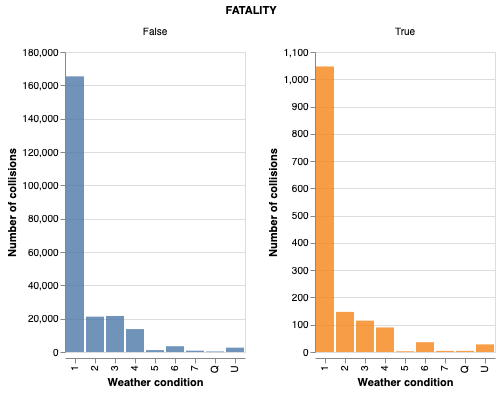

In [14]:
create_chart('C_WTHR', 'Weather condition')

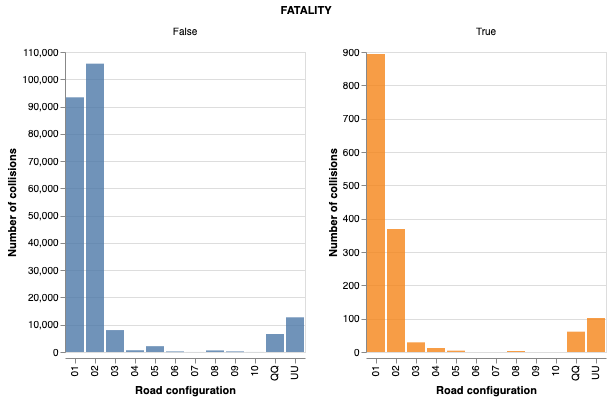

In [15]:
create_chart('C_RCFG', 'Road configuration')

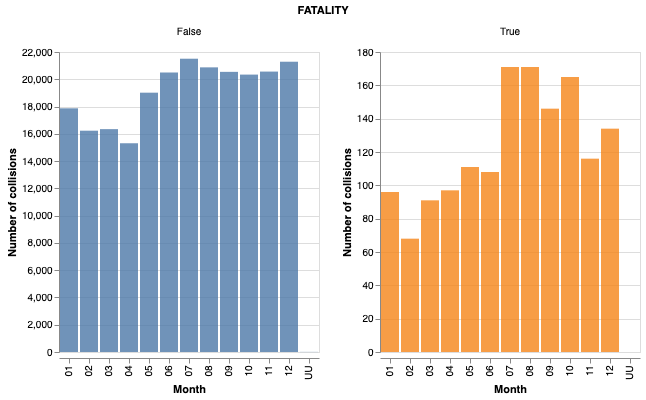

In [16]:
create_chart('C_MNTH', 'Month')

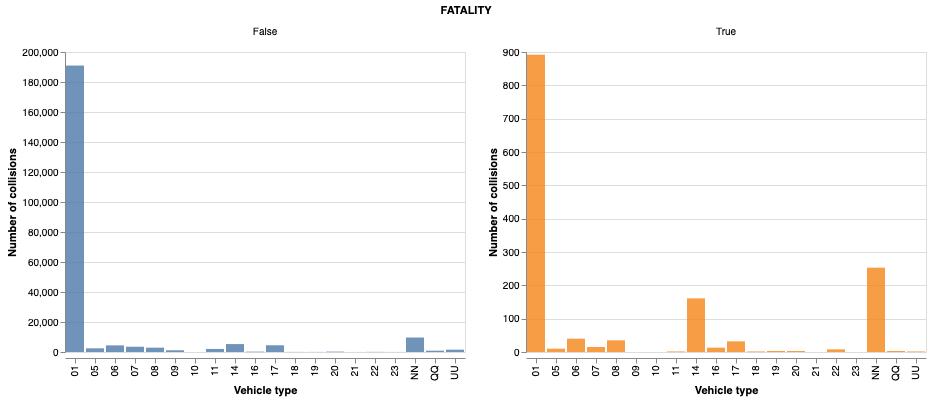

In [17]:
create_chart('V_TYPE', 'Vehicle type')

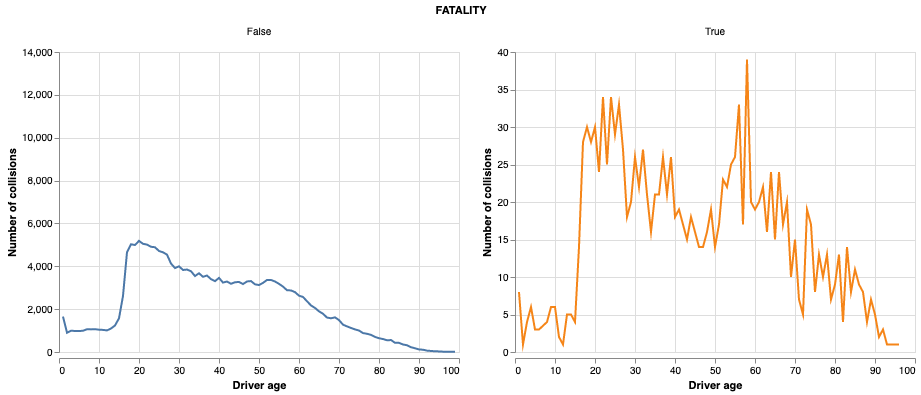

In [18]:
create_chart('P_AGE', 'Driver age')

## Create a profile report using `pandas-profiling`

In [19]:
# pip install pandas-profiling
# pip install ipywidgets

from pandas_profiling import ProfileReport

profile = ProfileReport(ncdb, title='National Collision Database 2017')

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]